In [76]:
#Importing all the libraries needed
import pandas as pd
import numpy as np
import os
import joblib
#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestClassifier
from sklearn.svm import SVC 

from scipy import stats

#Library for file processing
import pickle

**Dataset**

In [77]:
##Reading the contents of the file

file_name = '/content/heart_statlog_cleveland_hungary_final.xls'
data = pd.read_csv(file_name)

In [78]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [79]:
#Shape of the dataframe
data.shape

(1190, 12)

In [80]:
#Columns of the dataframe
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [81]:
##Statistics of the dataframe
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


**Data Preprocessing**

In [82]:
##We know from the data that 'sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope' are nominal variables. 

In [83]:
data['sex'].unique()

array([1, 0])

In [84]:
##Sex is a categorical variable, 1 for male and 0 for female, according to the data provided.
#Converting them into categorical variable, we have:

#Converting sex: 1 to male
data = data.replace({'sex': 1}, "male")
#Converting sex: 0 to female
data = data.replace({'sex': 0}, "female")

data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,male,2,140,289,0,0,172,0,0.0,1,0
1,49,female,3,160,180,0,0,156,0,1.0,2,1
2,37,male,2,130,283,0,1,98,0,0.0,1,0
3,48,female,4,138,214,0,0,108,1,1.5,2,1
4,54,male,3,150,195,0,0,122,0,0.0,1,0


In [85]:
data['chest pain type'].unique()

array([2, 3, 4, 1])

In [86]:
##We can see that 'chest pain type' is a categorical variable, 1 for Typical Angina, 2 for Atypical Angina, 3 for Non Cardiac Chest pain, 4 for Asymptomatic chest pain according to the data provided
#Converting them into their actual representation, we have:

#Converting 'chest pain type': 1 to 'Typical Angina'
data = data.replace({'chest pain type': 1}, "typical chest pain")
#Converting sex: 'chest pain type': 2 to 'Atypical Angina'
data = data.replace({'chest pain type': 2}, "atypical chest pain")
#Converting 'chest pain type': 3 to 'Non Cardiac Chest pain'
data = data.replace({'chest pain type': 3}, "non cardiac chest pain")
#Converting sex: 'chest pain type': 4 to 'Asymptomatic chest pain'
data = data.replace({'chest pain type': 4}, "asymptomatic chest pain")

data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,male,atypical chest pain,140,289,0,0,172,0,0.0,1,0
1,49,female,non cardiac chest pain,160,180,0,0,156,0,1.0,2,1
2,37,male,atypical chest pain,130,283,0,1,98,0,0.0,1,0
3,48,female,asymptomatic chest pain,138,214,0,0,108,1,1.5,2,1
4,54,male,non cardiac chest pain,150,195,0,0,122,0,0.0,1,0


In [87]:
data['chest pain type'].value_counts()

asymptomatic chest pain    625
non cardiac chest pain     283
atypical chest pain        216
typical chest pain          66
Name: chest pain type, dtype: int64

In [88]:
data['resting ecg'].unique()

array([0, 1, 2])

In [89]:
##Converting values in the column 'resting ecg' to their actual representation

#Converting 'resting ecg': 0 to 'normal'
data = data.replace({'resting ecg': 0}, "normal")
#Converting sex: 'resting ecg': 1 to 'st-t wave abnormality'
data = data.replace({'resting ecg': 1}, "st-t wave abnormality")
#Converting 'resting ecg': 2 to 'left ventricular hypertrophy'
data = data.replace({'resting ecg': 2}, "left ventricular hypertrophy")

data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,male,atypical chest pain,140,289,0,normal,172,0,0.0,1,0
1,49,female,non cardiac chest pain,160,180,0,normal,156,0,1.0,2,1
2,37,male,atypical chest pain,130,283,0,st-t wave abnormality,98,0,0.0,1,0
3,48,female,asymptomatic chest pain,138,214,0,normal,108,1,1.5,2,1
4,54,male,non cardiac chest pain,150,195,0,normal,122,0,0.0,1,0


In [90]:
data['resting ecg'].value_counts()

normal                          684
left ventricular hypertrophy    325
st-t wave abnormality           181
Name: resting ecg, dtype: int64

In [91]:
data['ST slope'].unique()

array([1, 2, 3, 0])

In [92]:
##For the column 'ST slope', the values are represented as follows: (0: Normal), (1,upsloping), (2, flat), (3, downsloping)

#Converting 'ST slope': 0 to 'normal'
data = data.replace({'ST slope': 0}, "normal")
#Converting sex: 'ST slope': 1 to 'upsloping'
data = data.replace({'ST slope': 1}, "upsloping")
#Converting 'ST slope': 2 to 'flat'
data = data.replace({'ST slope': 2}, "flat")
#Converting 'ST slope': 3 to 'downsloping'
data = data.replace({'ST slope': 3}, "downsloping")

data.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,male,atypical chest pain,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non cardiac chest pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical chest pain,130,283,0,st-t wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic chest pain,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non cardiac chest pain,150,195,0,normal,122,0,0.0,upsloping,0


In [93]:
data['ST slope'].value_counts()

flat           582
upsloping      526
downsloping     81
normal           1
Name: ST slope, dtype: int64

In [94]:
#We only have 1 record for ST slope: Normal, we can remove it as it cannot help during training.

index = data[ data['ST slope'] == 'normal'].index
# Delete these row indexes from dataFrame
data.drop(index, inplace=True)

In [95]:
data['ST slope'].value_counts()

flat           582
upsloping      526
downsloping     81
Name: ST slope, dtype: int64

In [96]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,male,atypical chest pain,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non cardiac chest pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical chest pain,130,283,0,st-t wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic chest pain,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non cardiac chest pain,150,195,0,normal,122,0,0.0,upsloping,0


In [97]:
## Check if there are any missing values. No missing values, so no processing needed to delete records.
data.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [98]:
#statics of the columns which are numerical
data.describe(include =[np.number])

,age,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [99]:
#statistics of all the categorical columns in the dataframe
data.describe(include =[np.object])

,sex,chest pain type,resting ecg,ST slope
count,1189,1189,1189,1189
unique,2,4,3,3
top,male,asymptomatic chest pain,normal,flat
freq,908,625,683,582


**Data Visualization**

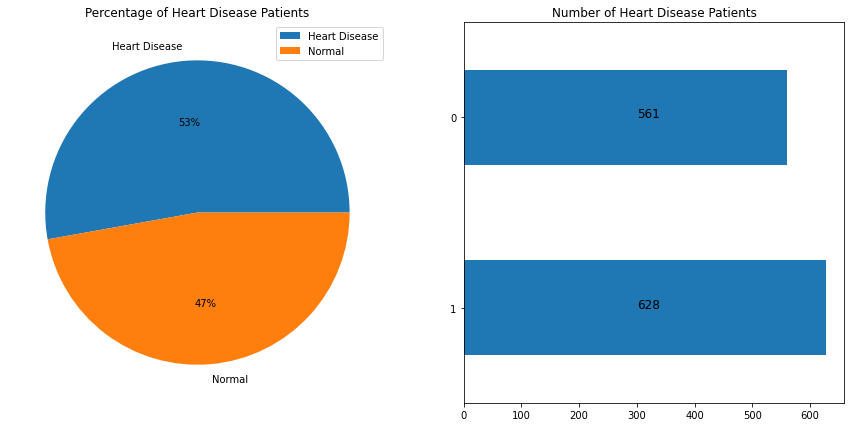

In [100]:
##Figure to indicate Heart Disease.
#Target:  0: No heart disease, 1: Heart disease

target = data['target']

fig = plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
plt.title('Percentage of Heart Disease Patients')
plt.pie(data["target"].value_counts().values, labels = ["Heart Disease","Normal"],autopct='%1.0f%%')
plt.legend()
plt.subplot(1,2,2)
plt.title('Number of Heart Disease Patients')
data["target"].value_counts().plot(kind="barh")
for i,j in enumerate(data["target"].value_counts().values):
    plt.text(300,i,j,fontsize=12,horizontalalignment= 'left')


plt.show()

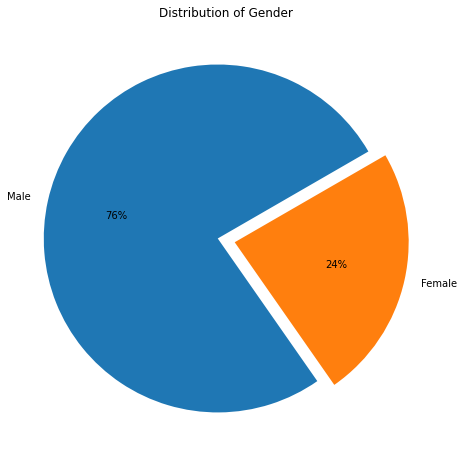

In [101]:
plt.figure(figsize=(10,8))
plt.pie(data["sex"].value_counts().values,autopct = "%1.0f%%",startangle = 30,labels=["Male","Female"],explode=[.05,.05])
plt.title("Distribution of Gender")
plt.show()

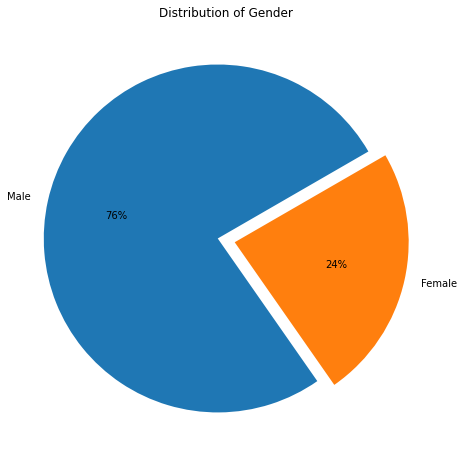

In [102]:
plt.figure(figsize=(10,8))
plt.pie(data["sex"].value_counts().values,autopct = "%1.0f%%",startangle = 30,labels=["Male","Female"],
explode=[.05,.05])
plt.title("Distribution of Gender")
plt.show()

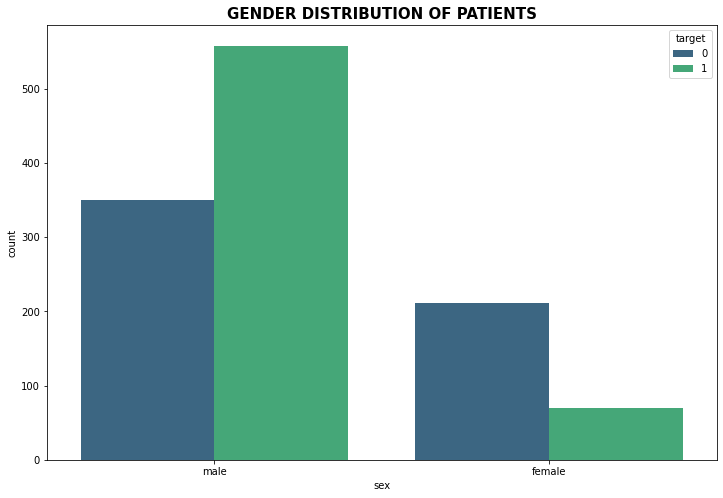

In [103]:
###Figure to indicate relationship between Gender and Heart Disease.
#Target:  0: No heart disease, 1: Heart disease
fig = plt.figure(figsize=(12,8))

sns.countplot(x = 'sex', hue = 'target', data = data, palette='viridis')
plt.title('GENDER DISTRIBUTION OF PATIENTS', fontsize=15, weight='bold' )
plt.show()


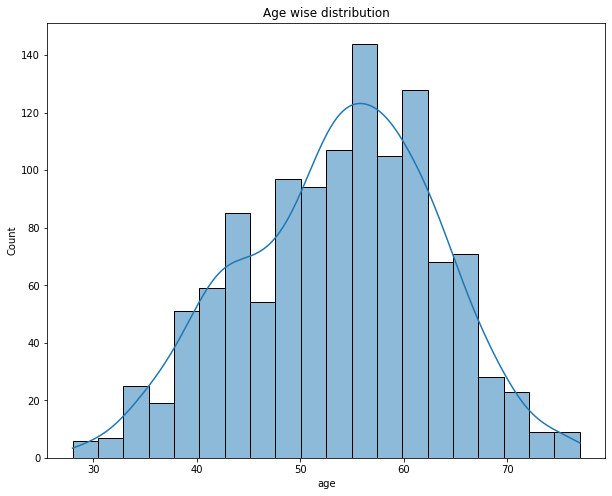

In [104]:
plt.figure(figsize=(10,8))
sns.histplot(data['age'],kde = 'True')
plt.title("Age wise distribution")
plt.show()

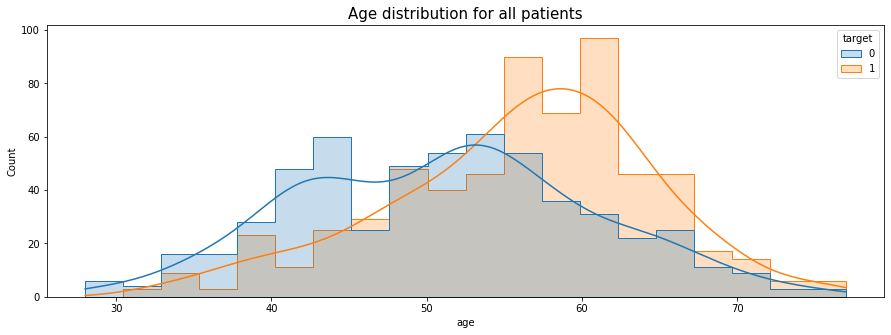

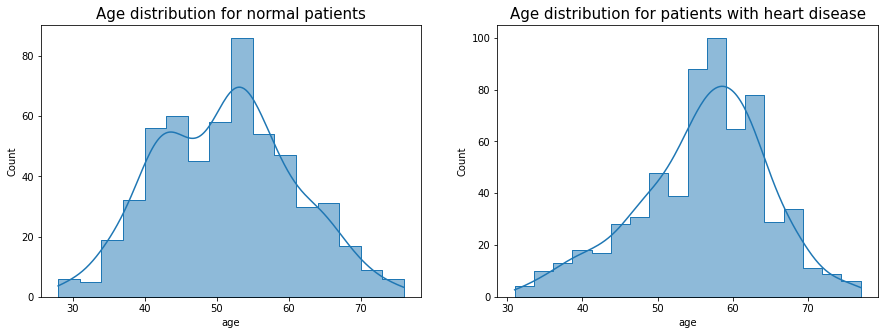

In [105]:
##Histogram to visualize age distribution among the patients

normal_patients=data[data['target']==0]
heart_patients=data[data['target']==1]

fig = plt.figure(figsize=(15,5))
sns.histplot(x = 'age', hue = 'target', data = data, kde = 'True', element='step')
plt.title('Age distribution for all patients', fontsize=15)

plt.show()

normal_patients=data[data['target']==0]
heart_patients=data[data['target']==1]

fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(normal_patients['age'], kde = 'True', element='step')
plt.title('Age distribution for normal patients', fontsize=15)

plt.subplot(1,2,2)
sns.histplot(heart_patients['age'], kde = 'True', element='step')
plt.title('Age distribution for patients with heart disease', fontsize=15)

plt.show()

In [106]:
data["resting ecg"].value_counts().values

array([683, 325, 181])

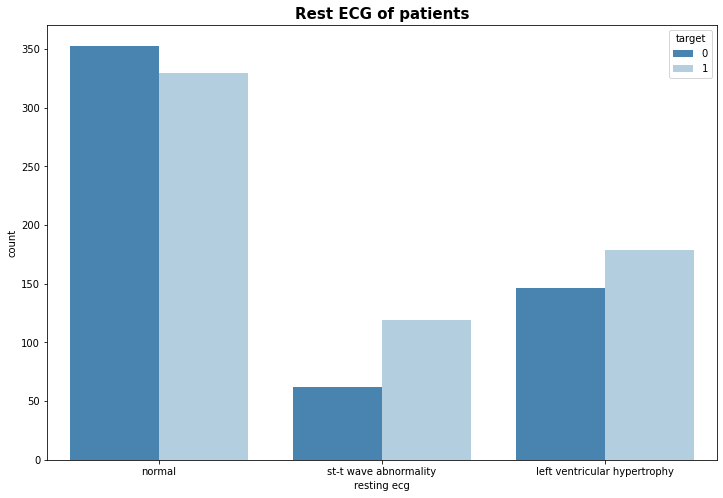

In [107]:
#Exploring the Heart Disease patients based on REST ECG

fig = plt.figure(figsize=(12,8))

sns.countplot(x = 'resting ecg', hue = 'target', palette= 'Blues_r', data = data)
plt.title('Rest ECG of patients', fontsize=15, weight='bold' )

plt.show()

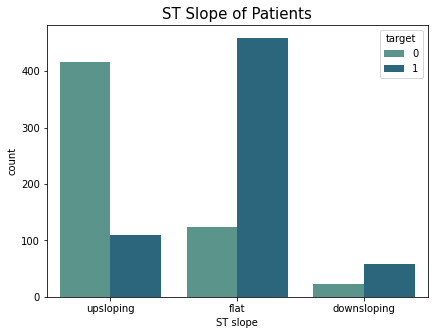

In [108]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'ST slope', hue = 'target', data = data,palette='crest')
plt.title('ST Slope of Patients', fontsize = 15)
plt.show()

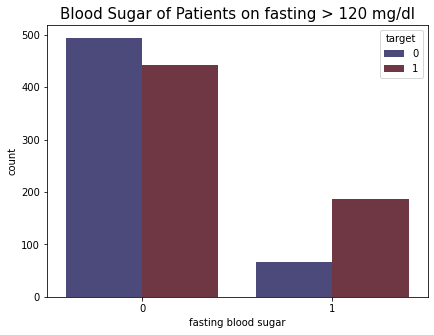

In [109]:
##Figure to indicate relationship between Blood Sugar and Heart Disease.
#Target:  0: No heart disease, 1: Heart disease

fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'fasting blood sugar', hue = 'target', data = data,palette='icefire')
plt.title('Blood Sugar of Patients on fasting > 120 mg/dl', fontsize = 15)
plt.show()

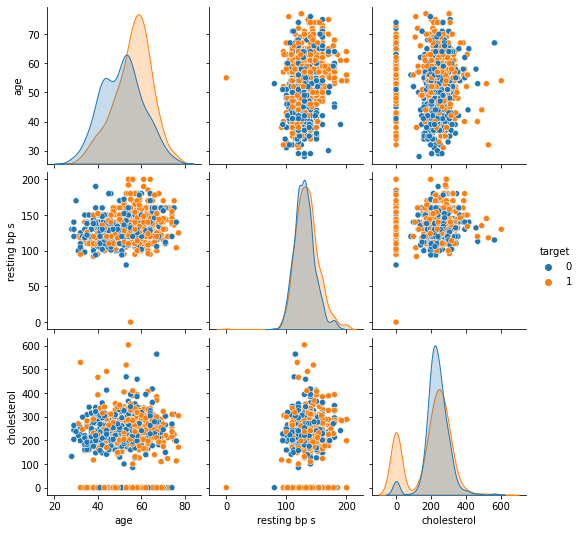

In [110]:
##Figure to indicate relationship between Age, Blood Pressure and Cholesterol.
#Target:  0: No heart disease, 1: Heart disease

sns.pairplot(data, hue = 'target', vars = ['age', 'resting bp s', 'cholesterol'] )

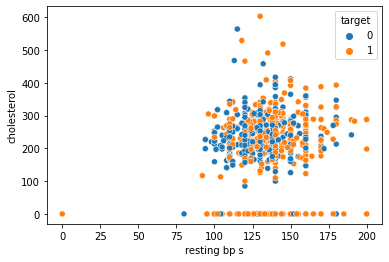

In [111]:
##Figure to indicate relationship between Age, Blood Pressure and Cholesterol.
#Target:  0: No heart disease, 1: Heart disease

sns.scatterplot(x = 'resting bp s', y = 'cholesterol',  hue = 'target', data = data)

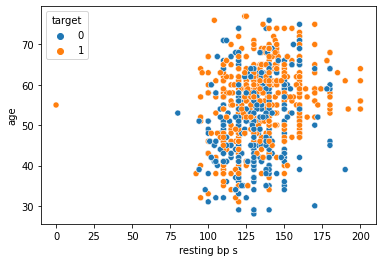

In [112]:
sns.scatterplot(x = 'resting bp s', y = 'age', hue = 'target', data = data)

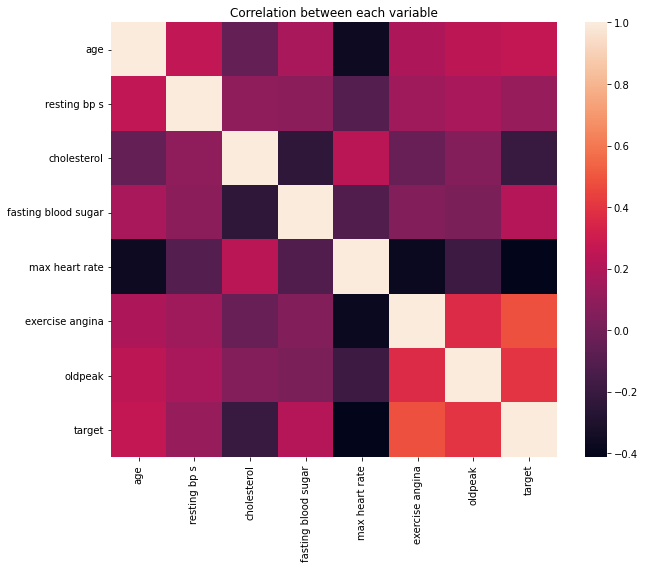

In [113]:
##Heatmap to indicate the correlation between all the columns in data

correlation_data = data.corr()

plt.figure(figsize = (10,8))
sns.heatmap(correlation_data)
plt.title('Correlation between each variable')
plt.show()

In [114]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [115]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

data_numeric = data[['age','resting bp s','cholesterol','max heart rate']]

In [116]:
data_numeric.head()

,age,resting bp s,cholesterol,max heart rate
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [117]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(data_numeric))
print(z)

[[1.46626567 0.4281359  0.7752277  1.26430092]
 [0.5035987  1.51737007 0.29951621 0.63725935]
 [1.78715466 0.11648118 0.71606748 1.63576637]
 ...
 [0.35210527 0.11648118 0.78265797 0.96953469]
 [0.35210527 0.11648118 0.2526458  1.34268112]
 [1.68019167 0.31921249 0.34881639 1.30349102]]


In [118]:
# Defining threshold for filtering outliers 
threshold = 2
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074]), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1]))


In [119]:
#filtering outliers and keeping only those data points which are below threshhold
data = data[(z < 3).all(axis=1)]

In [120]:
# checking shape of dataset after outlier removal
data.shape

(1172, 12)

In [121]:
## encoding categorical variables
data = pd.get_dummies(data, drop_first=True)

data.head()

,age,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,sex_male,chest pain type_atypical chest pain,chest pain type_non cardiac chest pain,chest pain type_typical chest pain,resting ecg_normal,resting ecg_st-t wave abnormality,ST slope_flat,ST slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,1,0,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,1,0,1,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,1,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,1,0,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,1,0,0,1


In [122]:
# checking the shape of dataset
data.shape

(1172, 16)

In [123]:
# segregating dataset into features i.e., X and target variables i.e., y
X = data.drop(['target'],axis=1)
y = data['target']

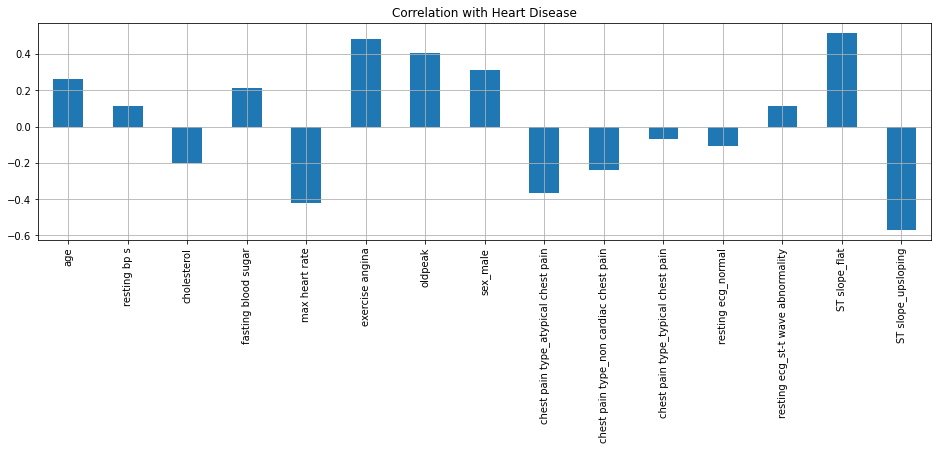

In [124]:
#Correlation of all the columns with only the output variable

X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Heart Disease", fontsize = 10,
        rot =90, grid = True)

plt.show()

**Data Modeling**

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X[['age','resting bp s','cholesterol','max heart rate','oldpeak']] = scaler.fit_transform(X[['age','resting bp s','cholesterol','max heart rate','oldpeak']])
X.head()

,age,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,sex_male,chest pain type_atypical chest pain,chest pain type_non cardiac chest pain,chest pain type_typical chest pain,resting ecg_normal,resting ecg_st-t wave abnormality,ST slope_flat,ST slope_upsloping
0,0.244898,0.571429,0.588595,0,0.777778,0,0.295455,1,1,0,0,1,0,0,1
1,0.428571,0.761905,0.366599,0,0.659259,0,0.409091,0,0,1,0,1,0,1,0
2,0.183673,0.476190,0.576375,0,0.229630,0,0.295455,1,1,0,0,0,1,0,1
3,0.408163,0.552381,0.435845,0,0.303704,1,0.465909,0,0,0,0,1,0,1,0
4,0.530612,0.666667,0.397149,0,0.407407,0,0.295455,1,0,1,0,1,0,0,1


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [127]:
## checking distribution of target variable in train test split
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
1    491
0    446
Name: target, dtype: int64
Distribution of target variable in test set
1    123
0    112
Name: target, dtype: int64


In [128]:
print('-----Shape of Training Set-----')
print(X_train.shape)
print(y_train.shape)

print('-----Shape of Test Set-----')
print(X_test.shape)
print(y_test.shape)

-----Shape of Training Set-----
(937, 15)
(937,)
-----Shape of Test Set-----
(235, 15)
(235,)


In [129]:
##Building an SVC Classifier model to predict heart disease

svc = SVC(kernel='linear',gamma='auto', C = 1)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)


In [130]:
matrix = confusion_matrix(y_test,y_pred_svc)

TN = matrix[0][0]
FN = matrix[1][0]
TP = matrix[1][1]
FP = matrix[0][1]

print('SVM:  Accuracy: ',accuracy_score(y_test, y_pred_svc))
print('Precision: ',precision_score(y_test, y_pred_svc))
print('Sensitivity: ',recall_score(y_test, y_pred_svc))
print('Specificity: ',TN/(TN+FP))
print('F1 Score: ',f1_score(y_test, y_pred_svc))


SVM:  Accuracy:  0.825531914893617
Precision:  0.8014705882352942
Sensitivity:  0.8861788617886179
Specificity:  0.7589285714285714
F1 Score:  0.8416988416988418


In [131]:
##Building an SVC Classifier with different parameters to predict heart disease

svc_r = SVC(kernel='rbf',gamma='auto', C = 1)
svc_r.fit(X_train,y_train)
y_pred_svc_r = svc_r.predict(X_test)


In [132]:
matrix = confusion_matrix(y_test,y_pred_svc_r)

TN = matrix[0][0]
FN = matrix[1][0]
TP = matrix[1][1]
FP = matrix[0][1]

print('SVM:  Accuracy: ',accuracy_score(y_test, y_pred_svc_r))
print('Precision: ',precision_score(y_test, y_pred_svc_r))
print('Sensitivity: ',recall_score(y_test, y_pred_svc_r))
print('Specificity: ',TN/(TN+FP))
print('F1 Score: ',f1_score(y_test, y_pred_svc_r))


SVM:  Accuracy:  0.8297872340425532
Precision:  0.8074074074074075
Sensitivity:  0.8861788617886179
Specificity:  0.7678571428571429
F1 Score:  0.8449612403100776


In [133]:
#Building an KNN Classifier model to predict heart disease

knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [134]:
matrix = confusion_matrix(y_test,y_pred_knn)

TN = matrix[0][0]
FN = matrix[1][0]
TP = matrix[1][1]
FP = matrix[0][1]

print('KNN:  Accuracy: ',accuracy_score(y_test, y_pred_knn))
print('Precision: ',precision_score(y_test, y_pred_knn))
print('Sensitivity: ',recall_score(y_test, y_pred_knn))
print('Specificity: ',TN/(TN+FP))
print('F1 Score: ',f1_score(y_test, y_pred_knn))


KNN:  Accuracy:  0.8212765957446808
Precision:  0.8188976377952756
Sensitivity:  0.8455284552845529
Specificity:  0.7946428571428571
F1 Score:  0.832


In [135]:
#Building a Decision Tree Classifier model to predict heart disease

dec = DecisionTreeClassifier()
dec.fit(X_train,y_train)
y_pred_dec = dec.predict(X_test)

In [136]:
matrix = confusion_matrix(y_test,y_pred_dec)

TN = matrix[0][0]
FN = matrix[1][0]
TP = matrix[1][1]
FP = matrix[0][1]

print('Decision Tree:  Accuracy: ',accuracy_score(y_test, y_pred_dec))
print('Precision: ',precision_score(y_test, y_pred_dec))
print('Sensitivity: ',recall_score(y_test, y_pred_dec))
print('Specificity: ',TN/(TN+FP))
print('F1 Score: ',f1_score(y_test, y_pred_dec))


Decision Tree:  Accuracy:  0.825531914893617
Precision:  0.8253968253968254
Sensitivity:  0.8455284552845529
Specificity:  0.8035714285714286
F1 Score:  0.8353413654618473


In [137]:
##Building a Random Forest Classifier model to predict heart disease

rf = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [138]:
matrix = confusion_matrix(y_test,y_pred_rf)

TN = matrix[0][0]
FN = matrix[1][0]
TP = matrix[1][1]
FP = matrix[0][1]

print('Random Forest:  Accuracy: ',accuracy_score(y_test, y_pred_rf))
print('Precision: ',precision_score(y_test, y_pred_rf))
print('Sensitivity: ',recall_score(y_test, y_pred_rf))
print('Specificity: ',TN/(TN+FP))
print('F1 Score: ',f1_score(y_test, y_pred_rf))

Random Forest:  Accuracy:  0.902127659574468
Precision:  0.8731343283582089
Sensitivity:  0.9512195121951219
Specificity:  0.8482142857142857
F1 Score:  0.9105058365758755


In [139]:
##Clearly Random Forest model has highest accuracy than other models

with open('model_pkl', 'wb') as files:
    pickle.dump(rf, files)

In [140]:
with open('model_pkl', 'rb') as file:
    dt = pickle.load(file)

In [141]:
root = os.path.abspath('')
model_path = os.path.join(root, 'project_final_final.ipynb')
joblib.dump(rf, model_path)

['/content/project_final_final.ipynb']

In [142]:
scaler_path = os.path.join(root, 'models_scaler.pkl')
with open(scaler_path, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)